In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and insights on the dataset

In [50]:
dfm=pd.read_csv('D4.csv')
dfm.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2019,90,89,3,98,IIT Bombay
1,2015,95,92,2,100,IIT delhi
2,2018,91,80,6,260,IIT kanpur
3,2017,88,85,2,222,IIT kharagpur
4,2016,89,84,1,600,IIT guwahati


In [51]:
dfm.columns

Index(['Year', '10th Marks', '12th Marks', '12th Division', 'AIEEE Rank',
       'College'],
      dtype='object')

In [52]:
dfm.isnull().sum()

Year             0
10th Marks       0
12th Marks       0
12th Division    0
AIEEE Rank       0
College          0
dtype: int64

In [53]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           1004 non-null   int64 
 1   10th Marks     1004 non-null   int64 
 2   12th Marks     1004 non-null   int64 
 3   12th Division  1004 non-null   int64 
 4   AIEEE Rank     1004 non-null   int64 
 5   College        1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


In [54]:
dfm.dtypes

Year              int64
10th Marks        int64
12th Marks        int64
12th Division     int64
AIEEE Rank        int64
College          object
dtype: object

## Understanding on the features and basic renaming

In [55]:
college_counts = dfm['College'].value_counts()

# Print the count of unique colleges
print("Number of unique colleges:", len(college_counts))
print("\nCount of each unique college:")
print(college_counts)


Number of unique colleges: 38

Count of each unique college:
College
IIT palakkad                  50
Ahemedabad IT                 49
S O A  university             49
SSN college of ENGG           45
Manipal IT                    43
IIT jodhpur                   43
NMIMS                         42
IIT jammu                     35
SRMIST chennai                32
IIT bhilai                    32
IIT goa                       30
IIT indore                    30
IIEST shibpur                 29
KLEF hydrabad                 29
University college of ENGG    29
BIT Mesra                     29
MNIT jaipur                   29
BMS college of ENGG           29
MNNIT allahabad               29
HBUT kanpur                   25
IIT kanpur                    21
IIT Bombay                    20
IIT hydrabad                  19
MSIT                          19
IIT guwahati                  18
IIT kharagpur                 18
IIT delhi                     17
IIIT hydrabad                 17
IIT man

In [56]:
dfm['is_IIT'] = np.where(
    dfm['College'].str.startswith('IIT') |
    dfm['College'].str.startswith('NMIMS') |
    dfm['College'].str.startswith('NIT') |
    dfm['College'].str.startswith('BITS'),
    1,
    0
)

# Print the updated DataFrame
dfm.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College,is_IIT
0,2019,90,89,3,98,IIT Bombay,1
1,2015,95,92,2,100,IIT delhi,1
2,2018,91,80,6,260,IIT kanpur,1
3,2017,88,85,2,222,IIT kharagpur,1
4,2016,89,84,1,600,IIT guwahati,1


In [57]:
dfm.drop('College', axis=1, inplace=True)
dfm.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,is_IIT
0,2019,90,89,3,98,1
1,2015,95,92,2,100,1
2,2018,91,80,6,260,1
3,2017,88,85,2,222,1
4,2016,89,84,1,600,1


In [58]:
# Count the occurrences of each value in the 'is_IIT' column
is_iit_counts = dfm['is_IIT'].value_counts()

# Print the count of 1s and 0s in the 'is_IIT' column
print("Count of 1s (IIT):", is_iit_counts[1])
print("Count of 0s (Non-IIT):", is_iit_counts[0])


Count of 1s (IIT): 463
Count of 0s (Non-IIT): 541


In [59]:
corr=dfm.corr()
corr.shape

(6, 6)

<Axes: >

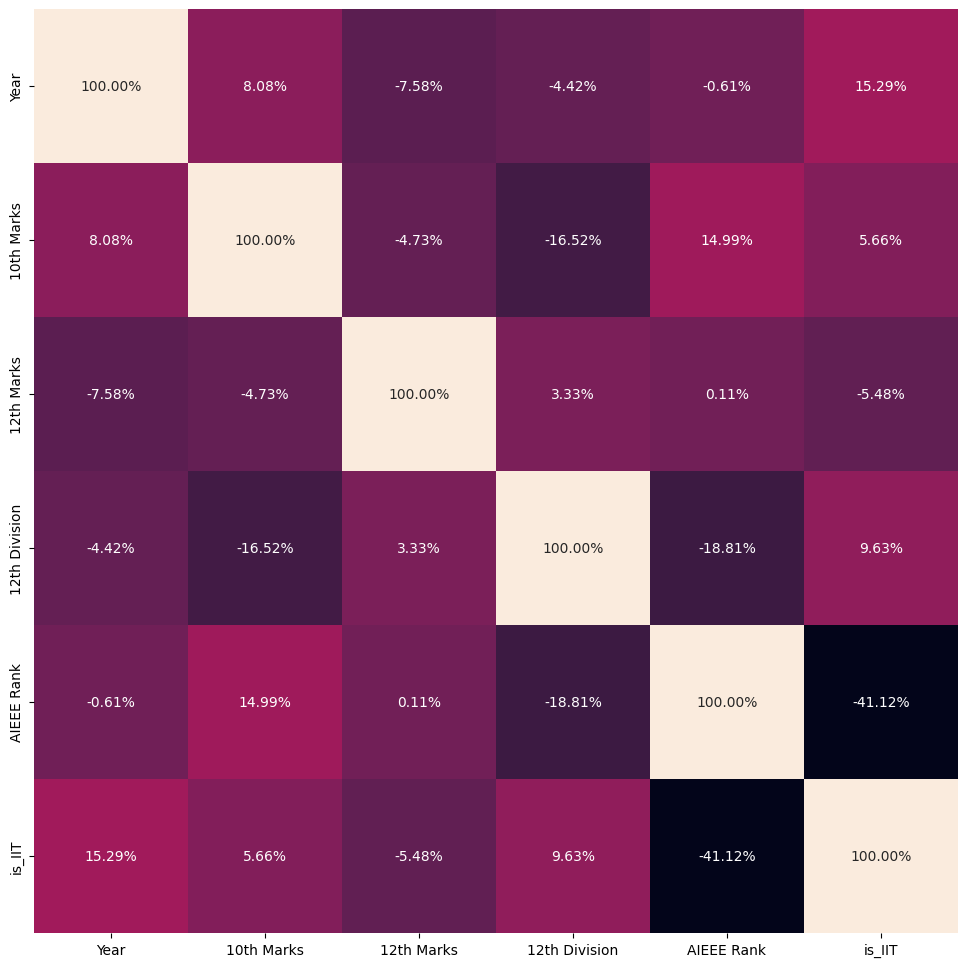

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=False, square= True, fmt='.2%', annot=True)

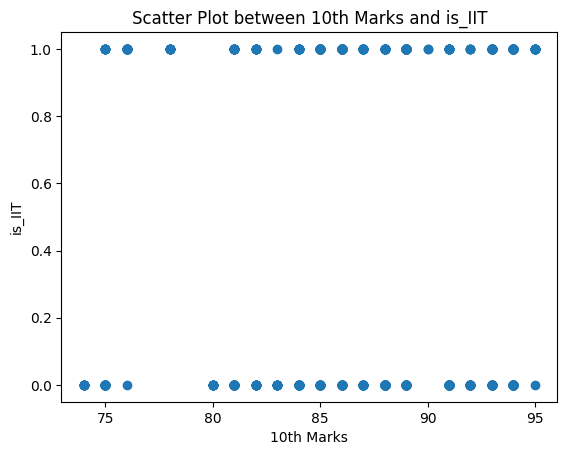

In [61]:
plt.scatter(dfm['10th Marks'], dfm['is_IIT'])
plt.xlabel('10th Marks')
plt.ylabel('is_IIT')
plt.title('Scatter Plot between 10th Marks and is_IIT')
plt.show()

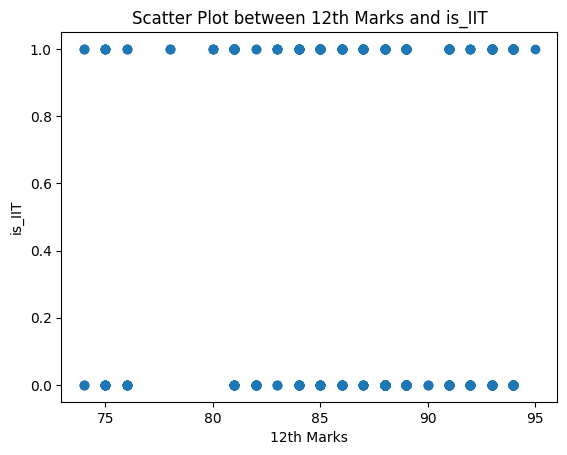

In [96]:
plt.scatter(dfm['12th Marks'], dfm['is_IIT'])
plt.xlabel('12th Marks')
plt.ylabel('is_IIT')
plt.title('Scatter Plot between 12th Marks and is_IIT')
plt.show()

## Splitting of the data

In [63]:
dfm.shape

(1004, 6)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfm.drop(['is_IIT'], axis = 1), dfm['is_IIT'], test_size=0.2)


In [65]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (803, 5)
X_test shape: (201, 5)
y_train shape: (803,)
y_test shape: (201,)


In [66]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Gradient Boost Classfier 

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.961389751552795
Test Score: 0.9601990049751243


In [69]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

In [70]:
from sklearn.metrics import accuracy_score
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test, gradient_booster.predict(X_test)))

GBC accuracy is 0.96


In [71]:
from sklearn.metrics import classification_report

pred=gradient_booster.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       119
           1       0.93      0.98      0.95        82

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201



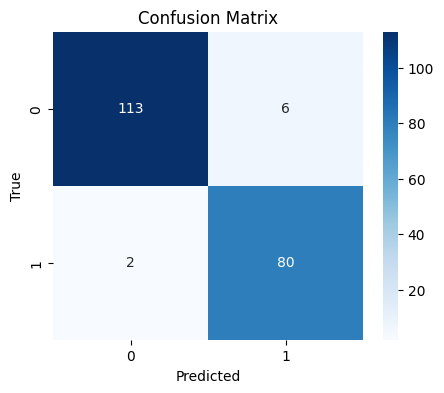

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = gradient_booster.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [73]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Train Score: 0.9725995024875622
Test Score: 0.9850746268656716


In [74]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

In [75]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 5}
Train Score: 0.9738432835820896
Test Score: 0.9850746268656716


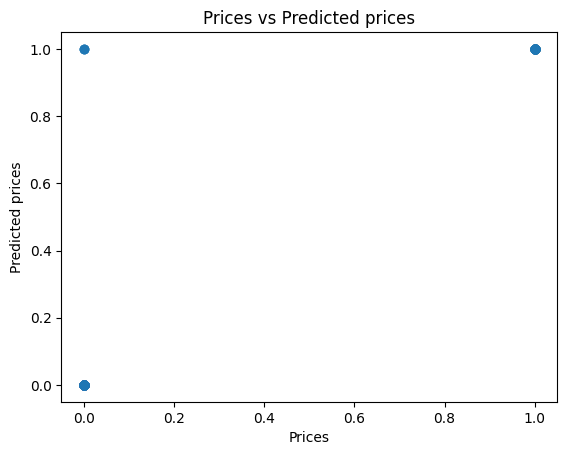

In [76]:
y_pred = gb_cv.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## SVC

In [77]:
from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.6675854037267082
Test Score: 0.681592039800995


In [78]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

In [79]:
# grid = {
#     'C':[0.01,0.1,1,10],
#     'kernel' : ["linear","poly","rbf","sigmoid"],
#     'degree' : [1,3,5,7],
#     'gamma' : [0.01,1]
# }

# svm  = SVC ()
# svm_cv = GridSearchCV(svm, grid, cv = 5)
# svm_cv.fit(X_train,y_train)
# print("Best Parameters:",svm_cv.best_params_)
# print("Train Score:",svm_cv.best_score_)
# print("Test Score:",svm_cv.score(X_test,y_test))

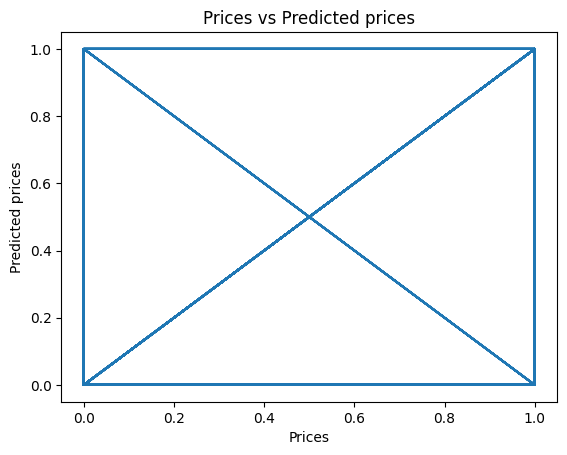

In [80]:
y_pred=svc.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

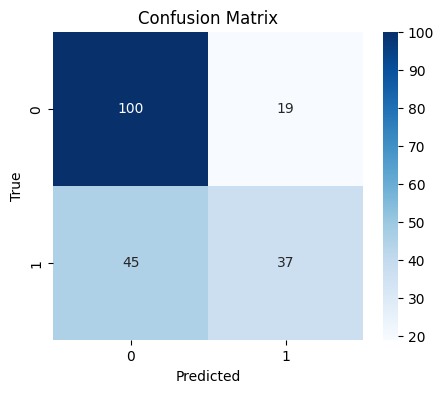

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [82]:
from sklearn.metrics import classification_report

pred=svc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       119
           1       0.66      0.45      0.54        82

    accuracy                           0.68       201
   macro avg       0.68      0.65      0.65       201
weighted avg       0.68      0.68      0.67       201



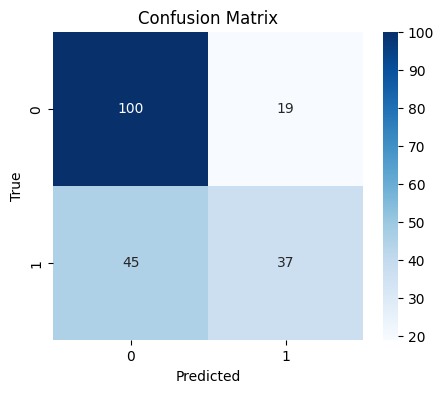

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


classifier = GaussianNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.6700310559006211
Test Score: 0.6368159203980099


In [85]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

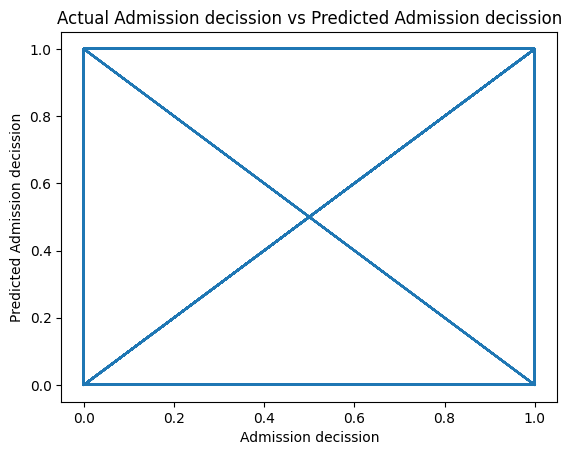

In [86]:
y_pred = classifier.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Admission decission")
plt.ylabel("Predicted Admission decission")
plt.title("Actual Admission decission vs Predicted Admission decission")
plt.show()

In [87]:
from sklearn.metrics import classification_report

pred=classifier.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67       119
           1       0.54      0.67      0.60        82

    accuracy                           0.64       201
   macro avg       0.64      0.64      0.63       201
weighted avg       0.65      0.64      0.64       201



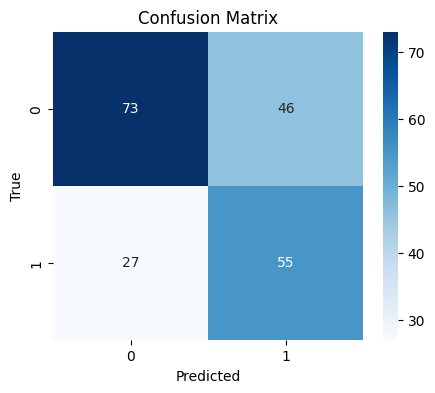

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Neural Networks

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# # Assuming 'data' is your DataFrame with the given columns
# df = pd.read_csv('D1.csv')
# df.head()
# Drop unnecessary columns
# column_to = ['name', 'id', 'dob', 'nationality', 'mother_tongue']
# df = df.drop(columns=column_to)

# # Convert 'gender' to 0 and 1
# df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# # Convert 'Admission_status' to 0 and 1
# df['Admission_status'] = df['Admission_status'].replace({'Not Admitted': 0, 'Admitted': 1})

# # Convert 'Admission_status' to integer type
# # df['Admission_status'] = df['Admission_status'].astype(int)


# # Split the data into features and target
# X = df.drop('Admission_status', axis=1)
# y = df['Admission_status']

In [90]:

# Ensure 'y_train' is a NumPy array with the correct data type
y_train = np.array(y_train, dtype=np.float32)  # Use dtype=np.float32 if 'Admission_status' is float


# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f'Test accuracy: {test_acc * 100:.2f}%')

# # Print training accuracy
# train_acc = history.history['accuracy'][-1]
# print(f'Training accuracy: {train_acc * 100:.2f}%')

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (Previous code)
test_acc = model.evaluate(X_test_scaled, y_test)[1]

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_scaled)

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 8))
# test_acc = model.evaluate(X_test_scaled, y_test)[1]
print(f'Test accuracy: {test_acc*100:.2f}%')
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')


7/7 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5174
Epoch 1/50
21/21 [==============================] - 1s 10ms/step - loss: 0.6650 - accuracy: 0.5794 - val_loss: 0.6207 - val_accuracy: 0.6894
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7103 - val_loss: 0.5745 - val_accuracy: 0.7578
Epoch 3/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.6916 - val_loss: 0.5451 - val_accuracy: 0.7205
Epoch 4/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.7025 - val_loss: 0.5230 - val_accuracy: 0.7453
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7103 - val_loss: 0.5098 - val_accuracy: 0.7516
Epoch 6/50
21/21 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7243 - val_loss: 0.5016 - val_accuracy: 0.7391
Epoch 7/50
21/21 [==============================] - 0s 3ms/step - loss: 0.

In [92]:
from sklearn.metrics import classification_report

# Assuming you have trained your model as described in your code
# and you have X_test_scaled and y_test

# Make predictions on the test set
y_probs = model.predict(X_test_scaled)
y_pred = (y_probs > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Convert y_test to 1D array if it's not already
y_test = np.squeeze(y_test)

# Print the classification report
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       119
           1       0.87      0.87      0.87        82

    accuracy                           0.89       201
   macro avg       0.89      0.89      0.89       201
weighted avg       0.89      0.89      0.89       201



7/7 [==============================] - 0s 3ms/step


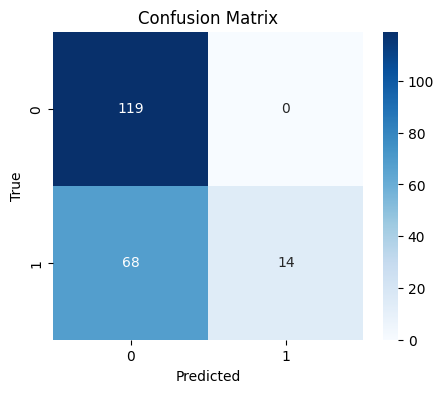

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_test, y_test, and model are already defined

# Make predictions
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## ROC curve

In [94]:
# # auc roc curve

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # generate two class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# # split into train-test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# # train models
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# # logistic regression
# model1 = LogisticRegression()
# # knn
# model2 = KNeighborsClassifier(n_neighbors=4)

# # fit model
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

# # predict probabilities
# pred_prob1 = model1.predict_proba(X_test)
# pred_prob2 = model2.predict_proba(X_test)


# from sklearn.metrics import roc_curve

# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# from sklearn.metrics import roc_auc_score

# # auc scores
# auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# print(auc_score1, auc_score2)

7/7 [==============================] - 0s 3ms/step


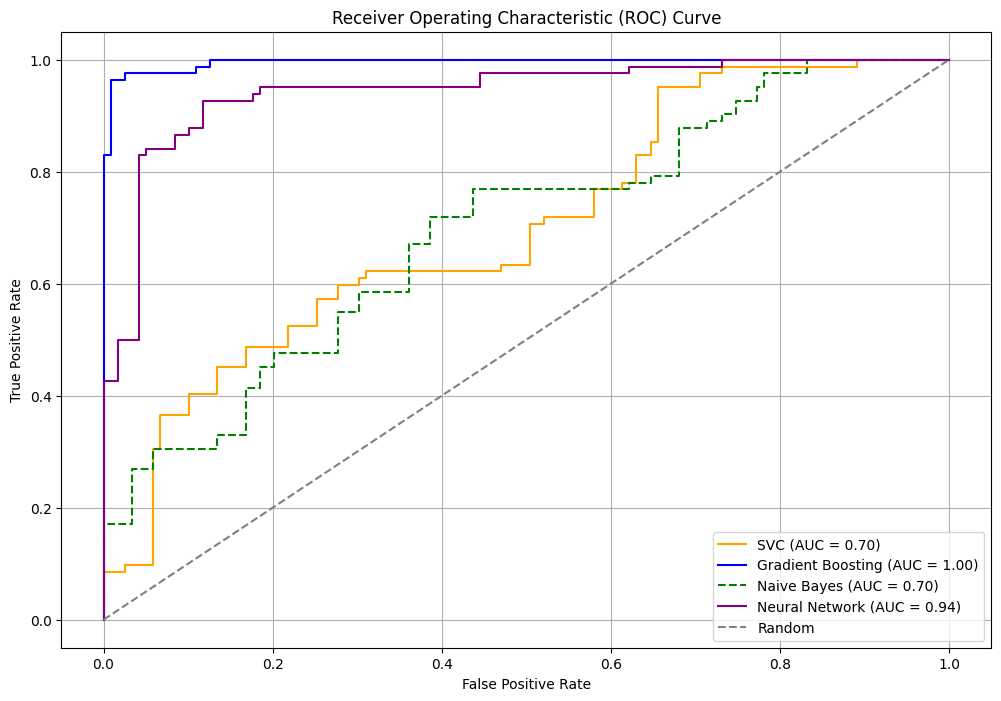

In [95]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained classifiers named svc, gradient_booster, and classifier
classifiers = [svc, gradient_booster, classifier]
labels = ['SVC', 'Gradient Boosting', 'Naive Bayes', 'Neaural Network']
colors = ['orange', 'blue', 'green', 'yellow']

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot ROC curve for each classifier
for classifier, label, color in zip(classifiers, labels, colors):
    # Assuming X_test and y_test are your test data
    if isinstance(classifier, SVC):
        y_scores = classifier.decision_function(X_test)
    else:
        y_scores = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with different line styles and colors
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', color=color, linestyle='--' if label == 'Naive Bayes' else '-')

# Plot ROC curve for the neural network
y_probs = model.predict(X_test_scaled)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})', color='purple', linestyle='-')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()